In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from scipy import signal

In [45]:
urlAddress    ='http://people.ucalgary.ca/~ranga/enel563/SIGNAL_DATA_FILES/ecgpvc.dat'
with urllib.request.urlopen(urlAddress) as url:
                wholeURL = url.read().decode('utf-8')
data_ECG = np.zeros(len(wholeURL.split('\n')))

j=0;
for line in wholeURL.splitlines():
    data_ECG[j] = float(line)
    j=j+1
data_ECG2  = data_ECG[0:data_ECG.size-1]
time_ECG   = np.arange(0,len(data_ECG2))
# Now detect the peak locations
peak_locations,_ = signal.find_peaks(data_ECG2,height=2400,distance=10)
peak_values      = data_ECG2[peak_locations]


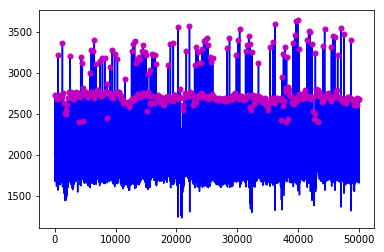

In [46]:
fig = plt.figure()
ax  = fig.add_subplot(111)

plt.plot(data_ECG2, linestyle='-', color='b')
plt.plot(peak_locations,peak_values, linestyle='', marker='o', color='m',markersize=5)

In [49]:
from bokeh.plotting import figure, output_file, show, output_notebook
# output to static HTML file
output_file("ECG.html")
#output_notebook()
# create a new plot with a title and axis labels
TOOLS = "hover,crosshair,pan,wheel_zoom,box_zoom,box_select,lasso_select,reset,save"


p = figure(title="Display ECG with Bokeh",
            tools=TOOLS,
           x_axis_label='time', y_axis_label='Electrical Activity')
# add a line renderer with legend and line thickness
p.line(time_ECG,data_ECG2, legend_label="ECG", line_width=1)
p.circle(peak_locations,peak_values, legend_label="peaks", fill_color="white", size=4,line_color="red")
# show the results
show(p)

D:\Python\lib\site-packages\bokeh\plotting\_tools.py:132: UserWarning: ResetTool(id='3941', ...) are being repeated
  warnings.warn("%s are being repeated" % ",".join(repeated_tools))
